In [29]:
#Importing the data and reading the unaltered dataset

import pandas
import graphviz
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
%matplotlib inline

data = pandas.read_csv('Telcom_churn.csv')
pandas.set_option('display.max_columns', 25)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [30]:
#Checking the distribution of Yes vs. No in the Churn column

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [31]:
#Checking each column for null values & updating their content to numerical data

data[data['gender'].isnull()]
data['gender'] = data['gender'].replace(to_replace=['Female', 'Male'], value=[0,1])
data['gender'].value_counts()

data[data['SeniorCitizen'].isnull()]

data[data['Partner'].isnull()]
data['Partner'] = data['Partner'].replace(to_replace=['Yes', 'No'], value=[0,1])
data['Partner'].value_counts()

data[data['Dependents'].isnull()]
data['Dependents'] = data['Dependents'].replace(to_replace=['Yes', 'No'], value=[0,1])
data['Dependents'].value_counts()

data[data['tenure'].isnull()]

data[data['PhoneService'].isnull()]
data['PhoneService'].unique()
data['PhoneService'] = data['PhoneService'].replace(to_replace=['Yes', 'No'], value=[0,1])
data['PhoneService'].value_counts()

data[data['MultipleLines'].isnull()]
data['MultipleLines'].unique()
data['MultipleLines'] = data['MultipleLines'].replace(to_replace=['Yes', 'No', 'No phone service'], value=[0,1,2])
data['MultipleLines'].value_counts()

data[data['InternetService'].isnull()]
data['InternetService'].unique()
data['InternetService'] = data['InternetService'].replace(to_replace=['DSL', 'Fiber optic', 'No'], value=[0,1,2])
data['InternetService'].value_counts()

data[data['OnlineSecurity'].isnull()]
data['OnlineSecurity'].unique()
data['OnlineSecurity'] = data['OnlineSecurity'].replace(to_replace=['Yes', 'No', 'No internet service'], value=[0,1,2])
data['OnlineSecurity'].value_counts()

data[data['OnlineBackup'].isnull()]
data['OnlineBackup'].unique()
data['OnlineBackup'] = data['OnlineBackup'].replace(to_replace=['Yes', 'No', 'No internet service'], value=[0,1,2])
data['OnlineBackup'].value_counts()

data[data['DeviceProtection'].isnull()]
data['DeviceProtection'].unique()
data['DeviceProtection'] = data['DeviceProtection'].replace(to_replace=['Yes', 'No', 'No internet service'], value=[0,1,2])
data['DeviceProtection'].value_counts()

data[data['TechSupport'].isnull()]
data['TechSupport'].unique()
data['TechSupport'] = data['TechSupport'].replace(to_replace=['Yes', 'No', 'No internet service'], value=[0,1,2])
data['TechSupport'].value_counts()

data[data['StreamingTV'].isnull()]
data['StreamingTV'].unique()
data['StreamingTV'] = data['StreamingTV'].replace(to_replace=['Yes', 'No', 'No internet service'], value=[0,1,2])
data['StreamingTV'].value_counts()

data[data['StreamingMovies'].isnull()]
data['StreamingMovies'].unique()
data['StreamingMovies'] = data['StreamingMovies'].replace(to_replace=['Yes', 'No', 'No internet service'], value=[0,1,2])
data['StreamingMovies'].value_counts()

data[data['Contract'].isnull()]
data['Contract'].unique()
data['Contract'] = data['Contract'].replace(to_replace=['Month-to-month', 'One year', 'Two year'], value=[0,1,2])
data['Contract'].value_counts()

data[data['PaperlessBilling'].isnull()]
data['PaperlessBilling'].unique()
data['PaperlessBilling'] = data['PaperlessBilling'].replace(to_replace=['Yes', 'No'], value=[0,1])
data['PaperlessBilling'].value_counts()

data[data['PaymentMethod'].isnull()]
data['PaymentMethod'].unique()
data['PaymentMethod'] = data['PaymentMethod'].replace(to_replace=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], value=[0,1,2,3])
data['PaymentMethod'].value_counts()

data[data['MonthlyCharges'].isnull()]

data[data['TotalCharges'].isnull()]
totalc_mean = data['TotalCharges'].mean()
data['TotalCharges'] = data['TotalCharges'].fillna(totalc_mean)

In [32]:
#Double check that the data has been properly adjusted to contain only numerical values

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,1,1,1,2,0,1,0,1,1,1,1,0,0,0,29.85,29.85,No
1,5575-GNVDE,1,0,1,1,34,0,1,0,0,1,0,1,1,1,1,1,1,56.95,1889.50,No
2,3668-QPYBK,1,0,1,1,2,0,1,0,0,0,1,1,1,1,0,0,1,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,1,45,1,2,0,0,1,0,0,1,1,1,1,2,42.30,1840.75,No
4,9237-HQITU,0,0,1,1,2,0,1,1,1,1,1,1,1,1,0,0,0,70.70,151.65,Yes
5,9305-CDSKC,0,0,1,1,8,0,0,1,1,1,0,1,0,0,0,0,0,99.65,820.50,Yes
6,1452-KIOVK,1,0,1,0,22,0,0,1,1,0,1,1,0,1,0,0,3,89.10,1949.40,No
7,6713-OKOMC,0,0,1,1,10,1,2,0,0,1,1,1,1,1,0,1,1,29.75,301.90,No
8,7892-POOKP,0,0,0,1,28,0,0,1,1,1,0,0,0,0,0,0,0,104.80,3046.05,Yes
9,6388-TABGU,1,0,1,0,62,0,1,0,0,0,1,1,1,1,1,1,2,56.15,3487.95,No


In [33]:
#Preparing data for use in various models

(data_train, data_test) = train_test_split(data, test_size = 0.2)

0.7310149041873669


Text(0.5, 0, 'Predicted label')

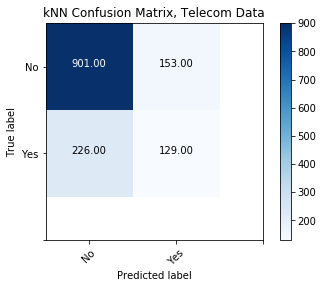

In [34]:
#Unweighted kNN with the 'personal data' predictors and small k value

model = KNeighborsClassifier(n_neighbors = 5)

predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
model.fit(data_train[predictors], data_train['Churn'])

predicted = model.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], predicted)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("kNN Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], model.classes_,rotation = 45)
plt.yticks([0,1,2], model.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.7629524485450674


Text(0.5, 0, 'Predicted label')

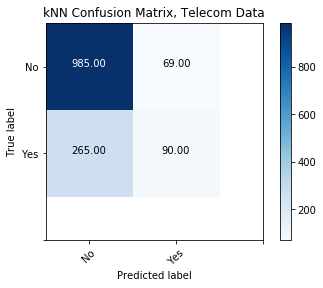

In [35]:
#Unweighted kNN with the 'personal data' predictors and large k value

model = KNeighborsClassifier(n_neighbors = 50)

predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
model.fit(data_train[predictors], data_train['Churn'])

predicted = model.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], predicted)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("kNN Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], model.classes_,rotation = 45)
plt.yticks([0,1,2], model.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.7792760823278921


Text(0.5, 0, 'Predicted label')

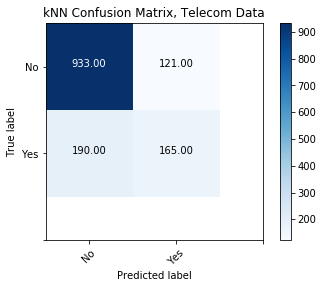

In [36]:
#Unweighted kNN with the 'company data' predictors and small k value

model = KNeighborsClassifier(n_neighbors = 5)

predictors = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', \
               'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

model.fit(data_train[predictors], data_train['Churn'])

predicted = model.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], predicted)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("kNN Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], model.classes_,rotation = 45)
plt.yticks([0,1,2], model.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.7991483321504613


Text(0.5, 0, 'Predicted label')

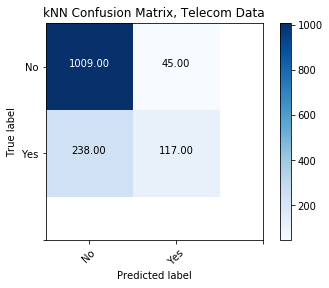

In [37]:
#Unweighted kNN with the 'company data' predictors and large k value

model = KNeighborsClassifier(n_neighbors = 50)

predictors = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', \
               'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

model.fit(data_train[predictors], data_train['Churn'])

predicted = model.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], predicted)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("kNN Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], model.classes_,rotation = 45)
plt.yticks([0,1,2], model.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.7806955287437899


Text(0.5, 0, 'Predicted label')

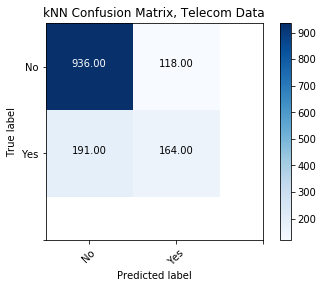

In [38]:
#Unweighted kNN with all columns as predictors and small k value

model = KNeighborsClassifier(n_neighbors = 5)

predictors = data.columns[1:-1]

model.fit(data_train[predictors], data_train['Churn'])

predicted = model.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], predicted)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("kNN Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], model.classes_,rotation = 45)
plt.yticks([0,1,2], model.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

0.7984386089425124


Text(0.5, 0, 'Predicted label')

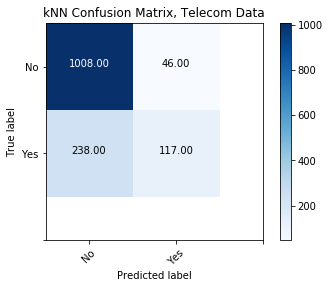

In [39]:
#Unweighted kNN with all columns as predictors and large k value

model = KNeighborsClassifier(n_neighbors = 50)

predictors = data.columns[1:-1]

model.fit(data_train[predictors], data_train['Churn'])

predicted = model.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], predicted)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("kNN Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], model.classes_,rotation = 45)
plt.yticks([0,1,2], model.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Most of these kNN models fail to inspire much hope in the way of a usable, useful way to predict churning. The highest accuracy out any of these six models was just 79.8%, barely 6% better than the baseline. However, the accuracy could potentially be artificially raised if the data wherein the model predicted yes when it was really no were removed, as that specific instance is functionally useless to predicting whether or not future customers will churn. It bogs down the results by appearing as an example of a customer that WOULD churn.

As far as which parameters performed best, it seems that a larger value of k is better across the board. Similarly, the company data columns (PhoneService on) seem to have the most pull in making a correct decision. The personal data kNN models both performed either even with the baseline or slightly better, while both models with company data and both models with all columns performed better.

0.7636621717530163


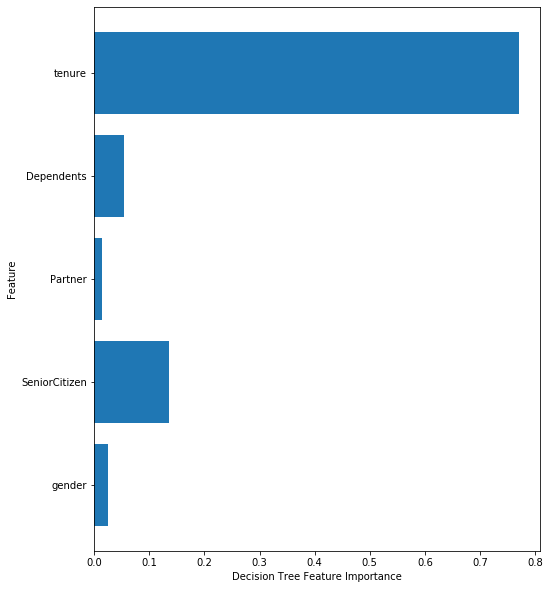

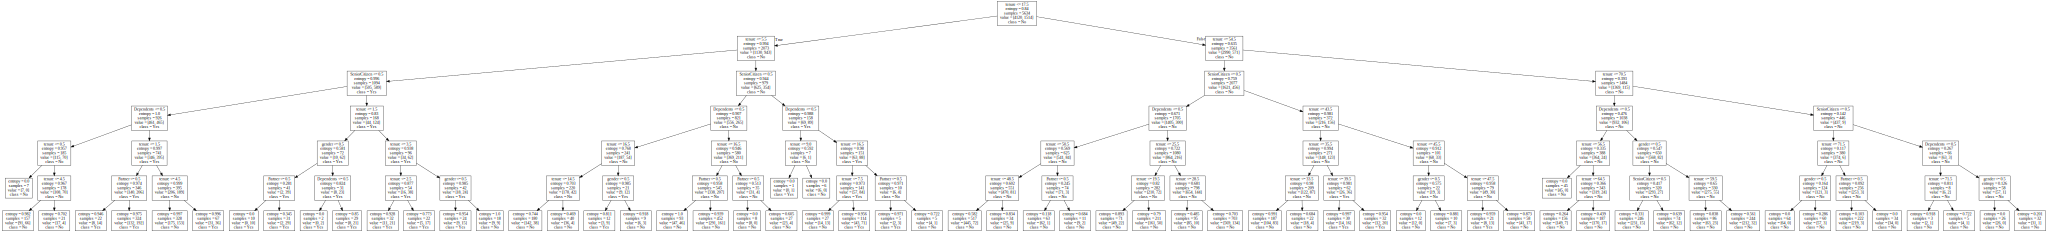

In [40]:
#Decision tree with 'personal data' predictors

dt = tree.DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')

predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
dt.fit(data_train[predictors], data_train['Churn'])

data_predictions = dt.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, dt.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Decision Tree Feature Importance")
plt.show()

tree_picture = tree.export_graphviz(dt, feature_names = predictors, class_names = dt.classes_, out_file=None)
graphviz.Source(tree_picture)

0.8034066713981547


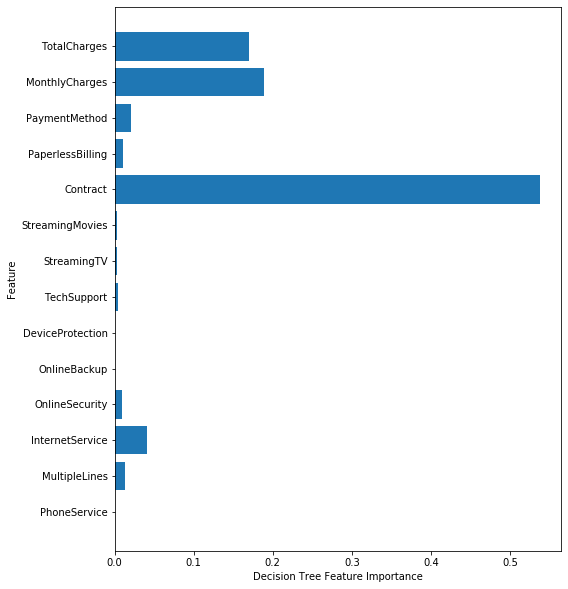

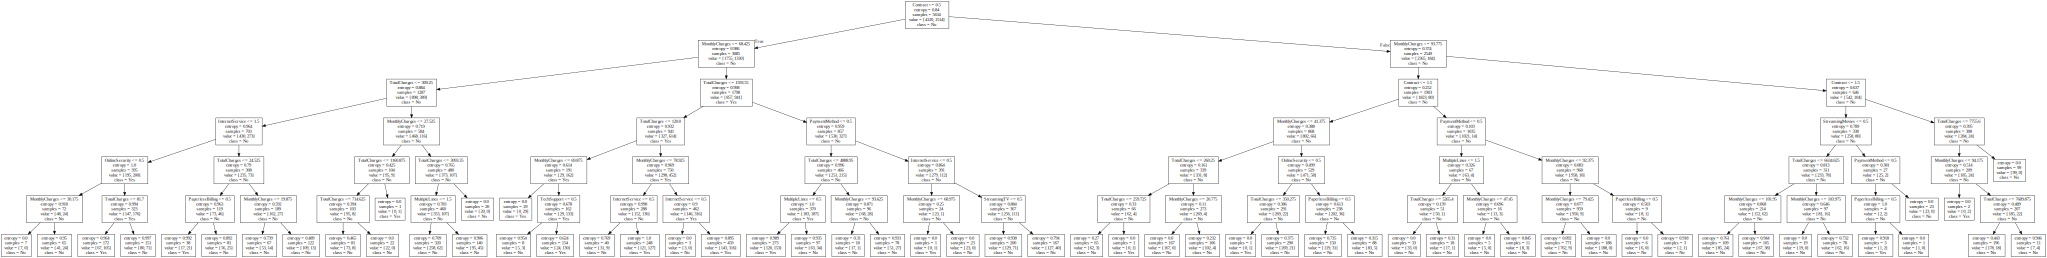

In [41]:
#Decision tree with 'company data' predictors

dt = tree.DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')

predictors = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', \
               'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
dt.fit(data_train[predictors], data_train['Churn'])

data_predictions = dt.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, dt.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Decision Tree Feature Importance")
plt.show()

tree_picture = tree.export_graphviz(dt, feature_names = predictors, class_names = dt.classes_, out_file=None)
graphviz.Source(tree_picture)

0.8062455642299503


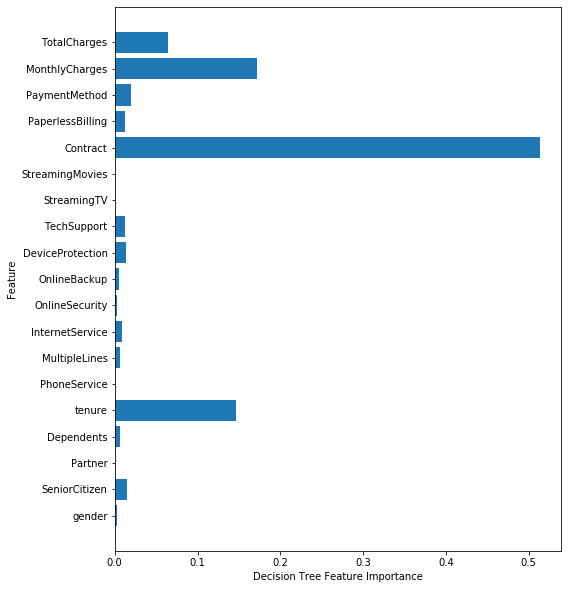

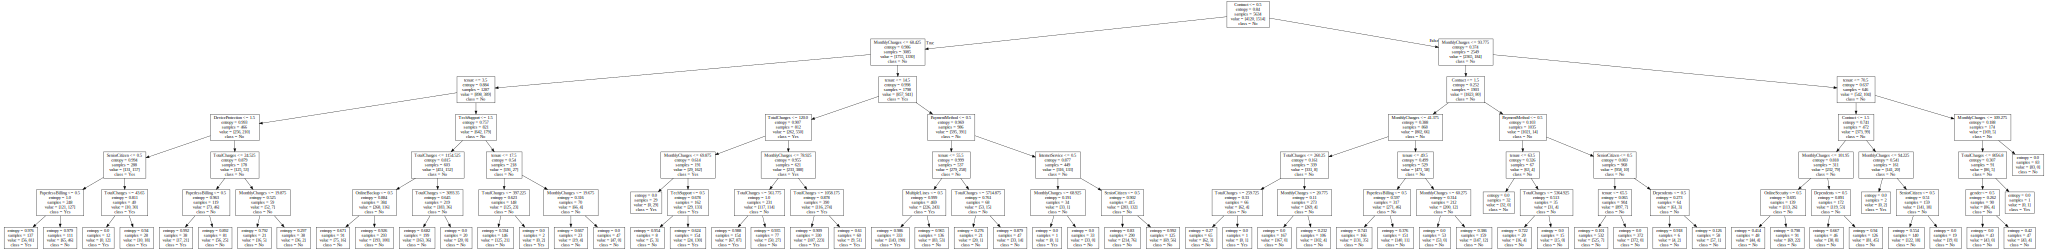

In [42]:
#Decision tree with all columns as predictors

dt = tree.DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')

predictors = data.columns[1:-1]
dt.fit(data_train[predictors], data_train['Churn'])

data_predictions = dt.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, dt.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Decision Tree Feature Importance")
plt.show()

tree_picture = tree.export_graphviz(dt, feature_names = predictors, class_names = dt.classes_, out_file=None)
graphviz.Source(tree_picture)

The decision trees all performed better than the baseline, although not by very much. Company data (or all columns) as predictors performed the best at about 80% accurate, while personal data managed to result in 76% accuracy. Feature importance showed that Tenure and Contract held the most weight in the personal vs. company data, respectively. In the combination of all columns, Contract was still the most valuable predictor by a long shot.

0.730305180979418


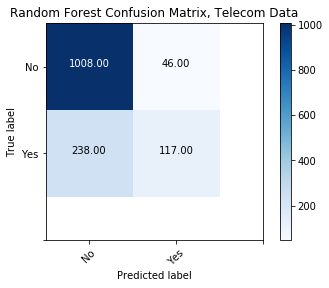

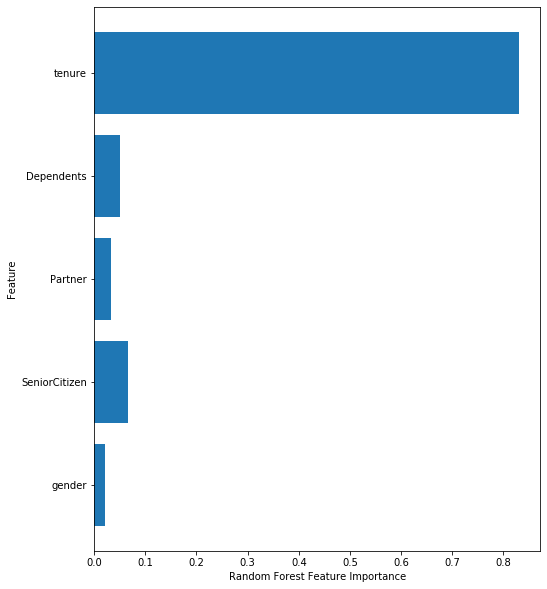

In [43]:
#Random Forest with 'personal data' predictors and a small number of trees

rf = RandomForestClassifier(n_estimators = 15)

predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
rf.fit(data_train[predictors], data_train['Churn'])

data_predictions = rf.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation = 45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, rf.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

0.7310149041873669


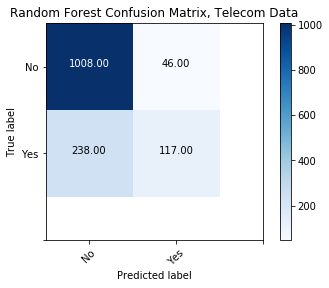

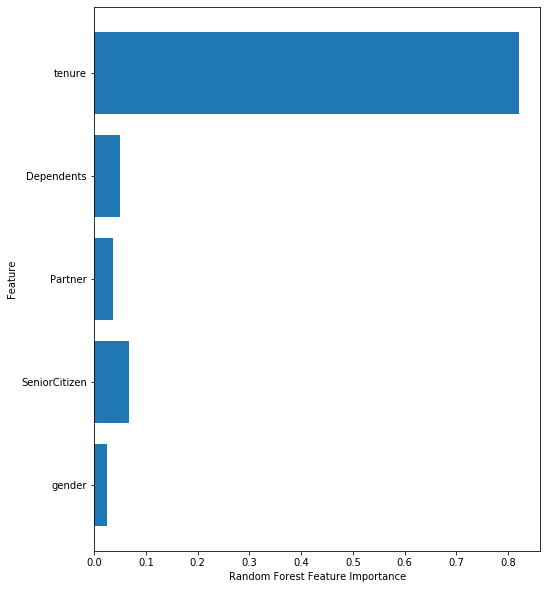

In [44]:
#Random Forest with 'personal data' predictors and a large number of trees

rf = RandomForestClassifier(n_estimators = 150)

predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
rf.fit(data_train[predictors], data_train['Churn'])

data_predictions = rf.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation = 45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, rf.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

The random forests utilizing personal data as predictors were pretty poor models - both of them performed worse than the baseline of 73.4%. The errors dragging accuracy down are almost always based on the model predicting that the customer would NOT churn, when they actually did. Although this model didn't predict no every time, the bit of error when predicting yes when the actual value was no still kept the accuracy roughly even with the baseline.

0.7977288857345636


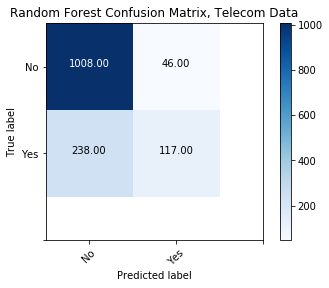

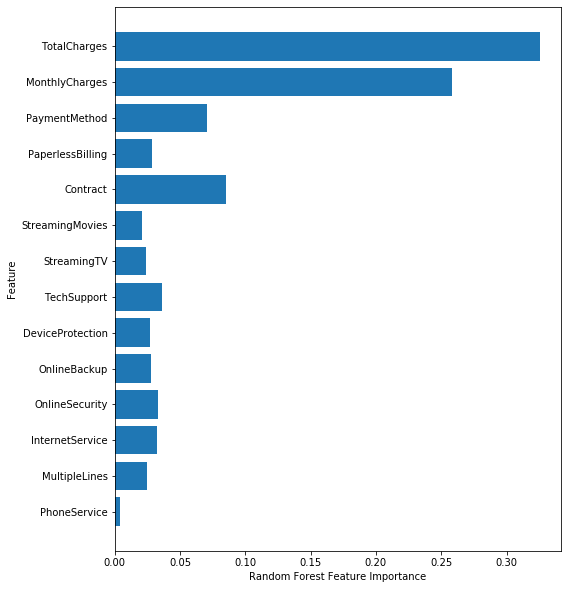

In [45]:
#Random Forest with 'company data' predictors and a small number of trees

rf = RandomForestClassifier(n_estimators = 15)

predictors = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', \
              'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
rf.fit(data_train[predictors], data_train['Churn'])

data_predictions = rf.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation = 45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, rf.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

0.8133427963094393


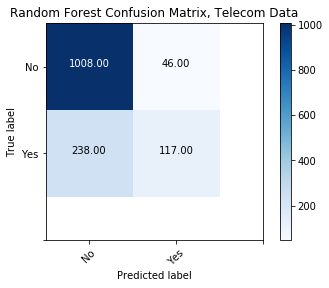

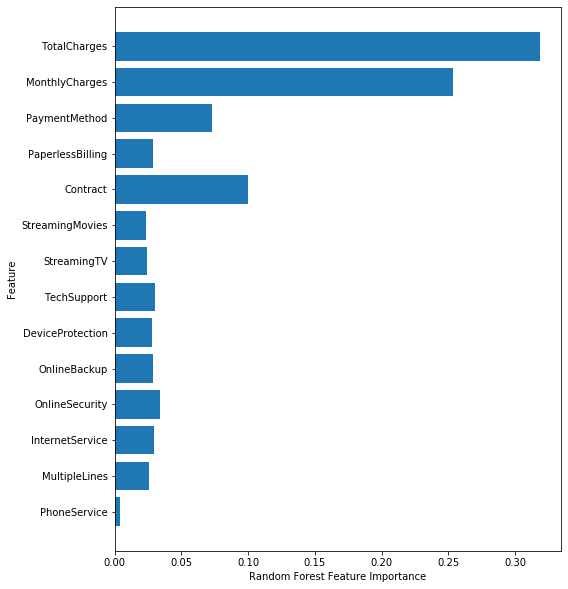

In [46]:
#Random Forest with 'company data' predictors and a large number of trees

rf = RandomForestClassifier(n_estimators = 150)

predictors = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', \
              'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
rf.fit(data_train[predictors], data_train['Churn'])

data_predictions = rf.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation = 45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, rf.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

0.8041163946061036


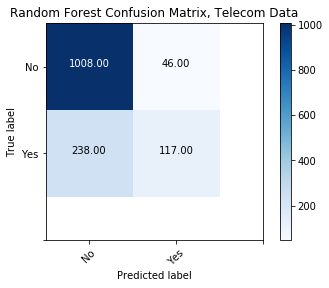

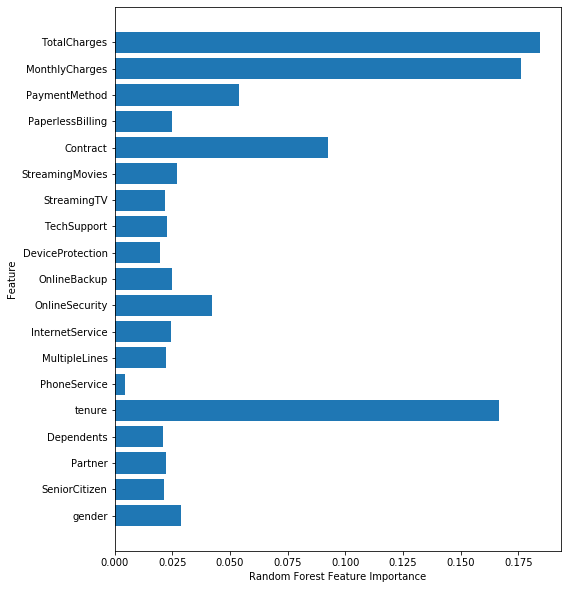

In [47]:
#Random Forest with all columns as predictors and a small number of trees

rf = RandomForestClassifier(n_estimators = 15)

predictors = data.columns[1:-1]
rf.fit(data_train[predictors], data_train['Churn'])

data_predictions = rf.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation = 45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, rf.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

0.8076650106458482


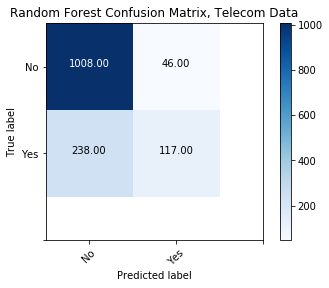

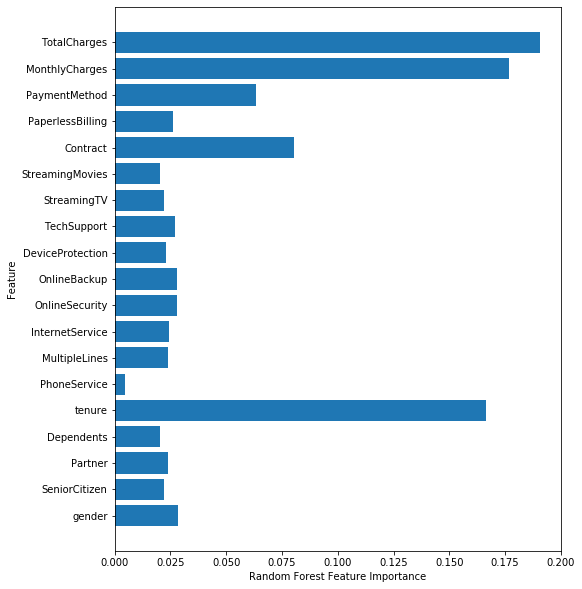

In [48]:
#Random Forest with all columns as predictors and a large number of trees

rf = RandomForestClassifier(n_estimators = 150)

predictors = data.columns[1:-1]
rf.fit(data_train[predictors], data_train['Churn'])

data_predictions = rf.predict(data_test[predictors])

accuracy = metrics.accuracy_score(data_test['Churn'], data_predictions)
print(accuracy)

cm = metrics.confusion_matrix(data_test['Churn'],predicted)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title("Random Forest Confusion Matrix, Telecom Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation = 45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment = "center",
        color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

index = range(len(predictors))

plt.figure(figsize = (8,10))
plt.barh(index, rf.feature_importances_, height = 0.8)
plt.ylabel('Feature')
plt.yticks(index, predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

Random forests with company data as predictors and all columns as predictors performed roughly the same at between .8 and .81 regardless of the number of trees. Feature importance shows that, in all four of these cases, TotalCharges proved to be the most useful in determining whether or not a customer would churn. Closely followed by MonthlyCharges, and then again by Tenure. Every other predictor had about the same amount of importance, hovering at about .025.

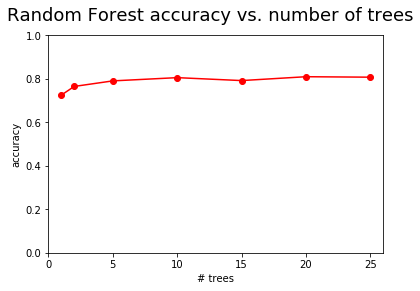

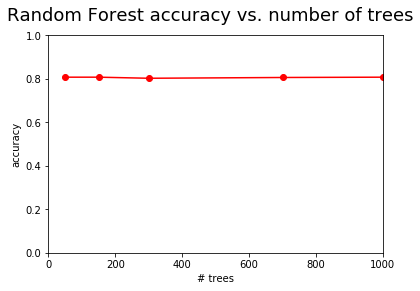

In [49]:
#Random Forest Accuracy Plot

def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []
    for n in n_estimator_values:
        curr_rf = RandomForestClassifier(n_estimators = n)
        curr_rf.fit(data_train[predictors], data_train['Churn'])
        curr_predictions = curr_rf.predict(data_test[predictors])
        curr_accuracy = metrics.accuracy_score(data_test['Churn'], curr_predictions)
        rf_accuracies.append(curr_accuracy)
        
    plt.suptitle('Random Forest accuracy vs. number of trees', fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values, rf_accuracies,'ro-')
    plt.axis([0, n_estimator_values[-1]+1, 0, 1])

    plt.show()
    
tune_number_of_trees([1, 2, 5, 10, 15, 20, 25])
tune_number_of_trees([50, 150, 300, 700, 1000])

These accuracy plots show that the number of trees in the random forests does not have a tremendous impact on accuracy beyond 10-15 trees. For most numbers, it will hover around .8 or slightly below.

In [50]:
#Perceptron with 'personal data' predictors

perc = Perceptron()

predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
perc.fit(data_train[predictors], data_train['Churn'])

data_perc_pre = perc.predict(data_test[predictors])

print(metrics.accuracy_score(data_test['Churn'], data_perc_pre))

0.25195173882185945


In [51]:
#Perceptron with 'company data' predictors

perc = Perceptron()

predictors = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', \
              'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
perc.fit(data_train[predictors], data_train['Churn'])

data_perc_pre = perc.predict(data_test[predictors])

print(metrics.accuracy_score(data_test['Churn'], data_perc_pre))

0.42086586231369766


In [52]:
#Perceptron with all columns as predictors

perc = Perceptron()

predictors = data.columns[1:-1]
perc.fit(data_train[predictors], data_train['Churn'])

data_perc_pre = perc.predict(data_test[predictors])

print(metrics.accuracy_score(data_test['Churn'], data_perc_pre))

0.6352022711142654


All three perceptrons above resulted in very poor accuracies; although the first model utilizing the personal data is potentially as useful as the baseline assuming the results opposite of its predictions are used.